<h1>Analiza Premier lige: Učinkovitost igrača i timova, statistička analiza lige

<h5>Autor: Matej Ćutuk

<h2>Uvod

<h5>Premier liga je najelitnija državna liga smještena u Engleskoj gdje se svake godine natječe 20 timova za titulu engleskog prvaka. u sezoni se odigra čak 380 utakmica. s obzirom da je nogomet timski sport i ovisi o cijeloj ekipi cjelokupno analizirati ću statistike igrača i njihove učinkovitosti na igru. </h5>
<h5>Iz tih razloga, i kao miljenik nogometa odlučio sam se za analizu ovakve teme. Kao razdoblje koje ću uzeti je zadnjih 10 godina po datasetu (od 2013 do 2023).</h5>
<h5> Prvi dataset koji ću uzeti je Ststistika igrača koji se sastoji od više skupova po kategorijama (npr kartoni,golovi) https://www.kaggle.com/datasets/davidantonioteixeira/premier-league-player-statistics-1992-2022/code
</h5>
<h5>Drugi dataset će zapravo biti sve odigrane utakmice po sezoni https://www.kaggle.com/datasets/evangower/premier-league-matches-19922022/code

**Opis implementacije**
 - Python i Pandas za Obradu Podataka
 - Rest API 
 - Pohrana na SQlite Bazu podataka
 - Matplotlib za vizualizaciju

**Prikaz rada apliakcije**

Za početak ćemo uvesti podatke svih utakmica

In [74]:
import pandas as pd

In [75]:
df =pd.read_csv('premier-league-matches.csv')

In [76]:
df

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR
0,1993,1,1992-08-15,Coventry City,2,1,Middlesbrough,H
1,1993,1,1992-08-15,Leeds United,2,1,Wimbledon,H
2,1993,1,1992-08-15,Sheffield Utd,2,1,Manchester Utd,H
3,1993,1,1992-08-15,Crystal Palace,3,3,Blackburn,D
4,1993,1,1992-08-15,Arsenal,2,4,Norwich City,A
...,...,...,...,...,...,...,...,...
12021,2023,38,2023-05-28,Everton,1,0,Bournemouth,H
12022,2023,38,2023-05-28,Leicester City,2,1,West Ham,H
12023,2023,38,2023-05-28,Aston Villa,2,1,Brighton,H
12024,2023,38,2023-05-28,Leeds United,1,4,Tottenham,A


**Uzeti ćemo razdoblje zadnjih 10 godina u datasetu(2013-2023)**

In [77]:
filtered_df = df[(df['Season_End_Year'] >= 2013) & (df['Season_End_Year'] <= 2023)]

**Ukupni golovi po sezonama**

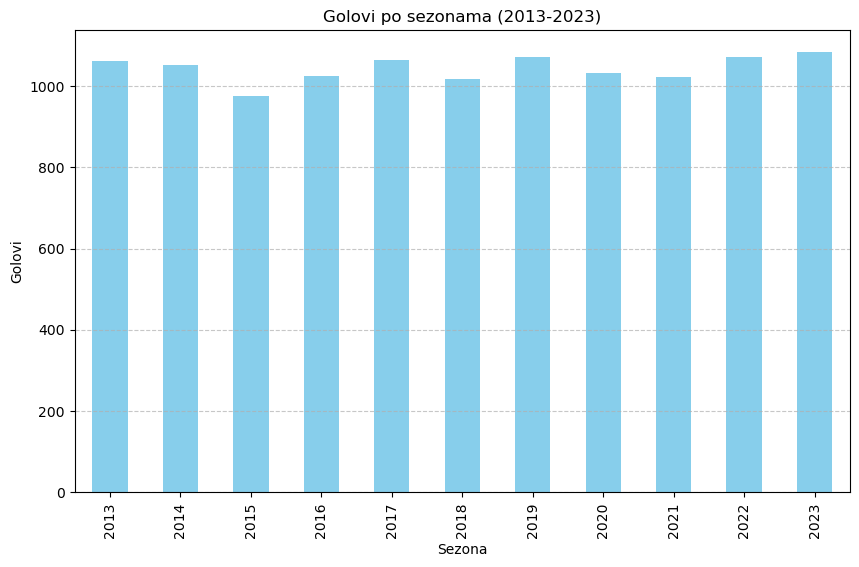

In [78]:
import matplotlib.pyplot as plt


filtered_df = df[(df['Season_End_Year'] >= 2013) & (df['Season_End_Year'] <= 2023)]

season_goals = filtered_df.groupby('Season_End_Year')[['HomeGoals', 'AwayGoals']].sum()
season_goals['TotalGoals'] = season_goals['HomeGoals'] + season_goals['AwayGoals']


plt.figure(figsize=(10, 6))
season_goals['TotalGoals'].plot(kind='bar', color='skyblue', title='Golovi po sezonama (2013-2023)')
plt.xlabel('Sezona')
plt.ylabel('Golovi')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Iz rezultata naše analize vidljivo je da se ne radi o nekom odstupanje lige iz sezone u sezonu, to joj u prilog doprinosi koliko je ona zaprvo kompetitivna. 

**Raspon ishoda utakmica(pobjeda/nerješeno/poraz)**

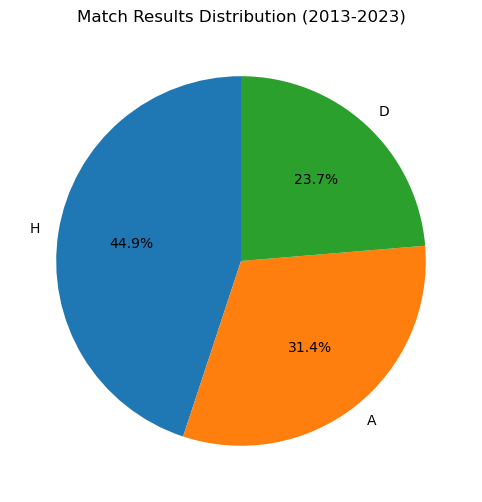

In [79]:

result_counts = filtered_df['FTR'].value_counts()
plt.figure(figsize=(8, 6))
result_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, title='Match Results Distribution (2013-2023)')
plt.ylabel('')
plt.show()

Kao što možemo vidjeti jako velik faktor je zapravo prednost domaćeg terena gdje u prosjeku skoro 45% pobjeda su timovi osvojili pred vlastitom publikom. To je jasan čimbenik koliko navijači, teren i putovanje dosta utječe i na rezultat.

**Gol razlika po zbroju 10 sezona**

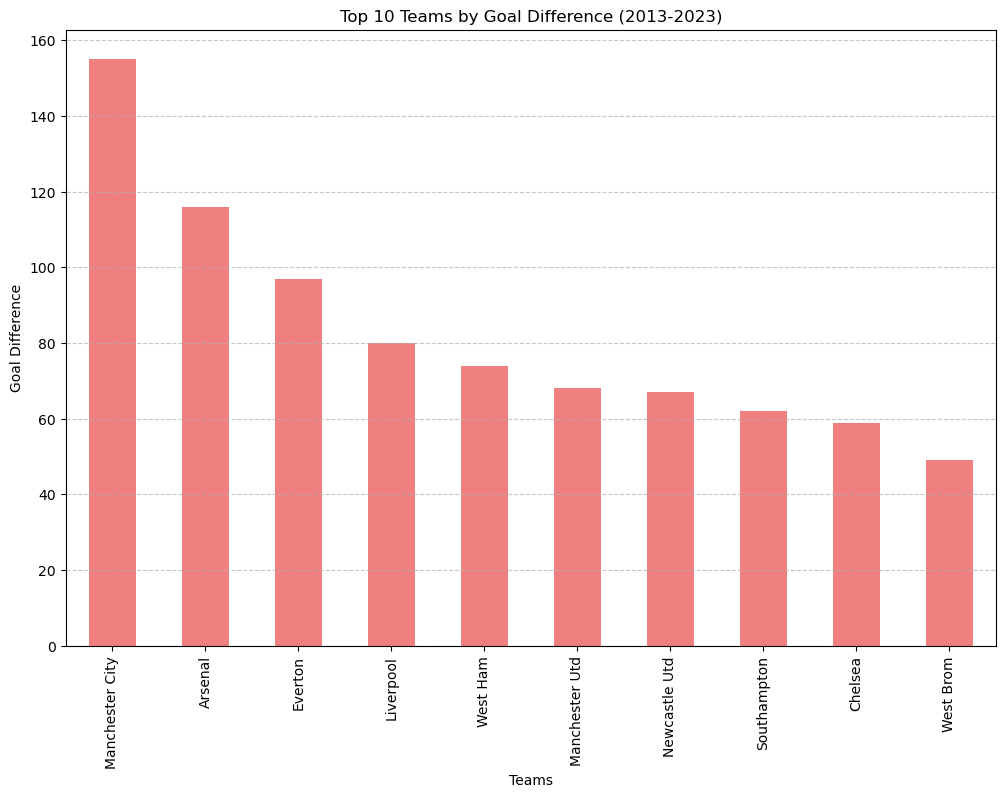

In [80]:

team_performance = filtered_df.groupby('Home')['HomeGoals'].sum() - filtered_df.groupby('Away')['AwayGoals'].sum()
team_performance = team_performance.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
team_performance.head(10).plot(kind='bar', color='lightcoral', title='Top 10 Teams by Goal Difference (2013-2023)')
plt.xlabel('Teams')
plt.ylabel('Goal Difference')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Kroz ovu analizu možemo vidjeti najefikasnije timove. Tim koji je imao najveću gol razliku je Manchester City.

**Utjecaj domaćeg terena na pobjedu**

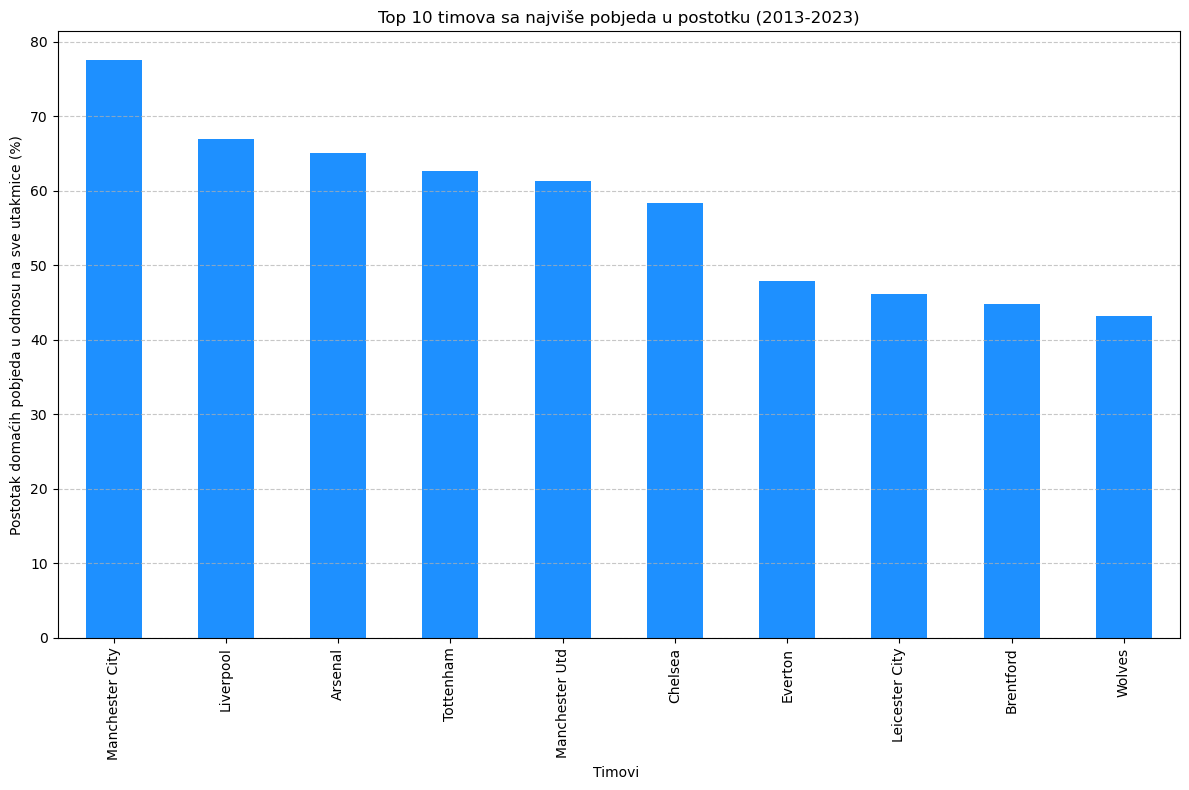

In [81]:
home_wins = filtered_df[filtered_df['FTR'] == 'H'].groupby('Home').size()

total_home_matches = filtered_df.groupby('Home').size()


home_win_percentage = (home_wins / total_home_matches * 100).sort_values(ascending=False)


plt.figure(figsize=(12, 8))
home_win_percentage.head(10).plot(kind='bar', color='dodgerblue', title='Top 10 timova sa najviše pobjeda u postotku (2013-2023)')
plt.xlabel('Timovi ')
plt.ylabel('Postotak domaćih pobjeda u odnosu na sve utakmice (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Kao što možemo vidjeti domaći teren je jako utjecao na određene klubove. Manchester City je čak od ukupnih utakmica skoro 80% pobjeda dobio upravo kod kuće. prosječno timovi imaju ujtecaj igranja doma preko 50% u korist da su pobijedili.

**Korelacija pobjede domaćih utakmica na odnosu na ukupne bodove**

C:\Users\Matej\AppData\Local\Temp\ipykernel_2520\1472435176.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  away_wins = filtered_df[df['FTR'] == 'A'].groupby('Away').size()


<Figure size 1000x600 with 0 Axes>

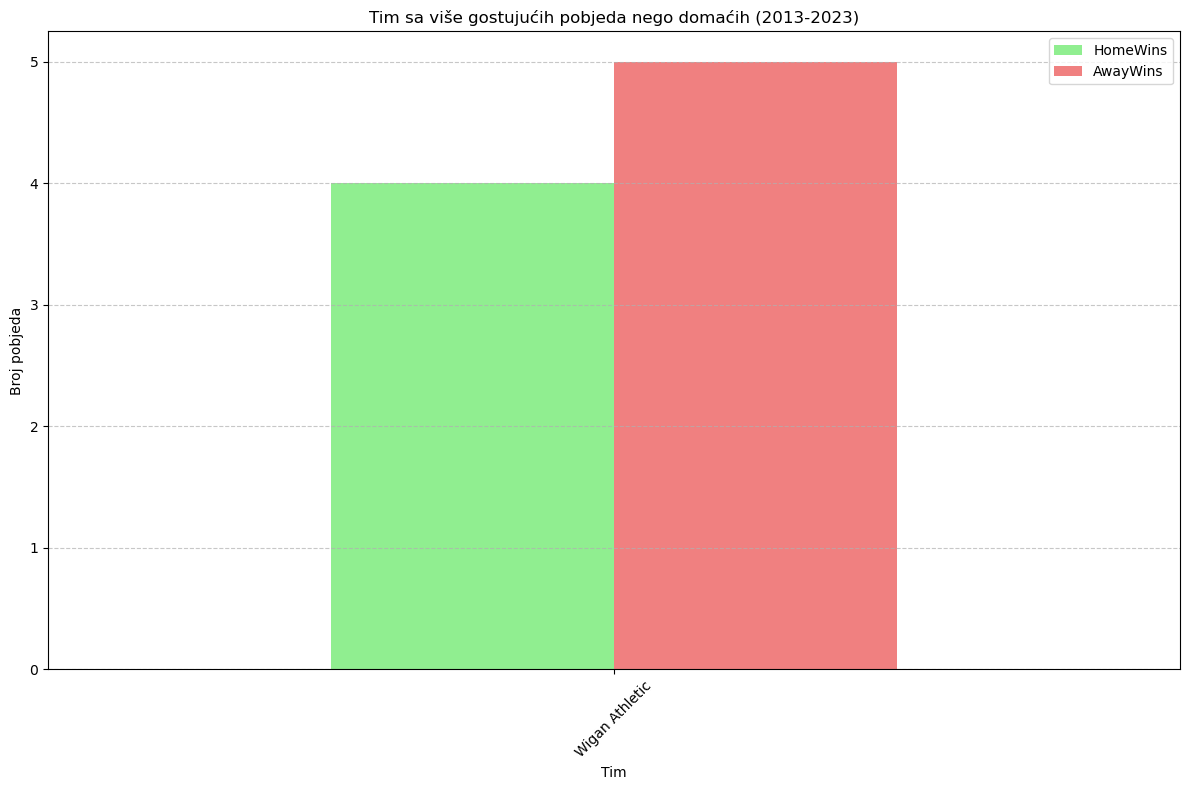

In [82]:


away_wins = filtered_df[df['FTR'] == 'A'].groupby('Away').size()


wins_comparison = pd.DataFrame({
    'HomeWins': home_wins,
    'AwayWins': away_wins
}).fillna(0)

wins_comparison['MoreAwayWins'] = wins_comparison['AwayWins'] > wins_comparison['HomeWins']

teams_more_away_wins = wins_comparison[wins_comparison['MoreAwayWins']].sort_values(by='AwayWins', ascending=False)

if not teams_more_away_wins.empty:
    plt.figure(figsize=(10, 6))
    teams_more_away_wins[['HomeWins', 'AwayWins']].plot(
        kind='bar', figsize=(12, 8), color=['lightgreen', 'lightcoral'], title='Tim sa više gostujućih pobjeda nego domaćih (2013-2023)'
    )
    plt.xlabel('Tim')
    plt.ylabel('Broj pobjeda')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("ne postoji")


Pregledom zadnjih 10 godina samo jedan tim je imao više gostujućih pobjeda nego domaćih. 

<h1>Unos drugog dataseata

Drugi daatset će biti popis igrača i broj golova po sezoni a kao što je korišteno u prvom daatsetu razdoblje 2013-2023 tako ćemo i u ovom.

In [83]:
df = pd.read_json('Goals.json')

In [84]:
df.head()

,Initial Year,Rank,Player,Club,Nationality,Stat
0,2022,1,Erling Haaland,Manchester City,Norway,36
1,2022,2,Harry Kane,-,England,30
2,2022,3,Ivan Toney,Brentford,England,20
3,2022,4,Mohamed Salah,Liverpool,Egypt,19
4,2022,5,Callum Wilson,Newcastle United,England,18


**Najbolji strijelci po sezoni**

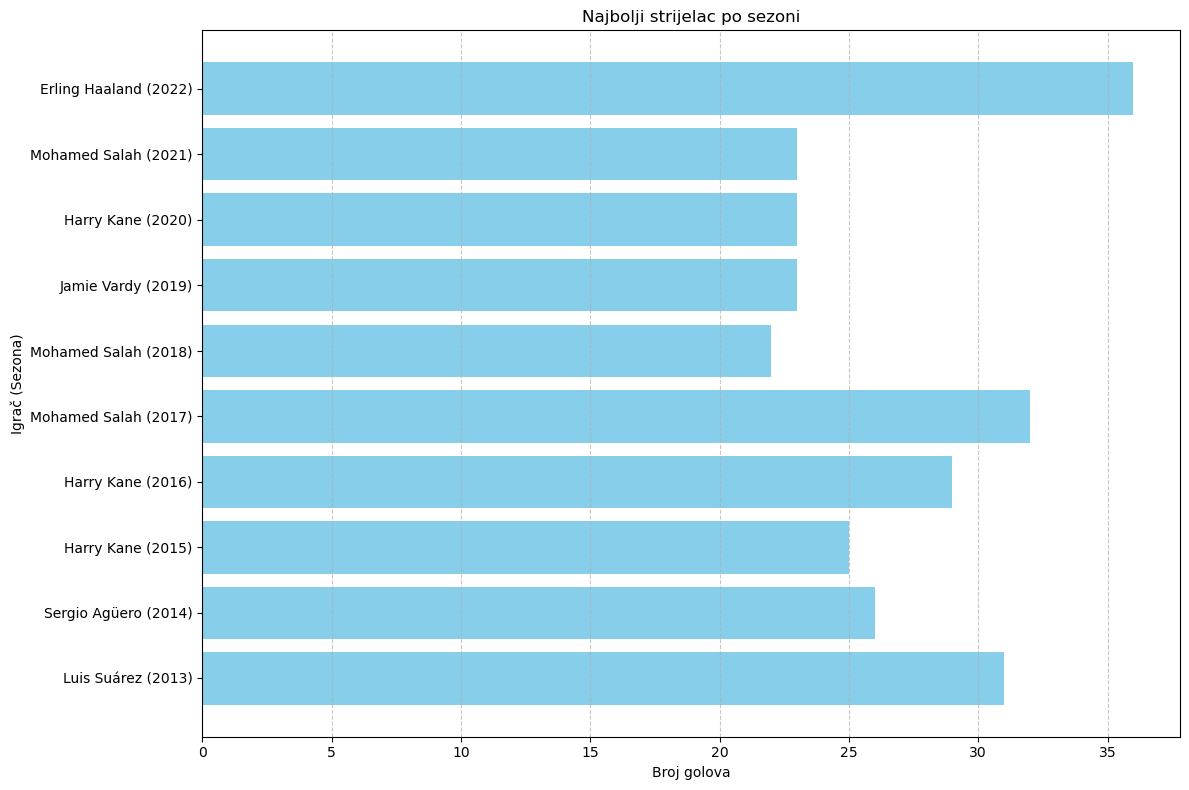

In [85]:



top_scorers_per_season = df.groupby(['Initial Year', 'Player'])['Stat'].sum().reset_index()


top_scorer_per_season = top_scorers_per_season.sort_values(['Initial Year', 'Stat'], ascending=[True, False]).groupby('Initial Year').head(1)


plt.figure(figsize=(12, 8))
plt.barh(top_scorer_per_season['Player'] + ' (' + top_scorer_per_season['Initial Year'].astype(str) + ')', 
         top_scorer_per_season['Stat'], color='skyblue')
plt.title("Najbolji strijelac po sezoni")
plt.xlabel("Broj golova")
plt.ylabel("Igrač (Sezona)")
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()




**Tko je imao njaviše nmajboljih strijelaca sezone**

In [112]:


top_scorers = goals_df[goals_df['Rank'] == 1]


club_top_scorers = top_scorers['Club'].value_counts()

most_top_scorers_club = club_top_scorers.idxmax()
most_top_scorers_count = club_top_scorers.max()

print(f"Klub s najviše najboljih strijelaca: {most_top_scorers_club} ({most_top_scorers_count} puta)")


print("\nBroj najboljih strijelaca po klubovima:")
print(club_top_scorers)


Klub s najviše najboljih strijelaca: - (8 puta)

Broj najboljih strijelaca po klubovima:
Club
-                    8
Liverpool            3
Manchester City      1
Tottenham Hotspur    1
Name: count, dtype: int64


**Najbolji strijelac iz svake države**

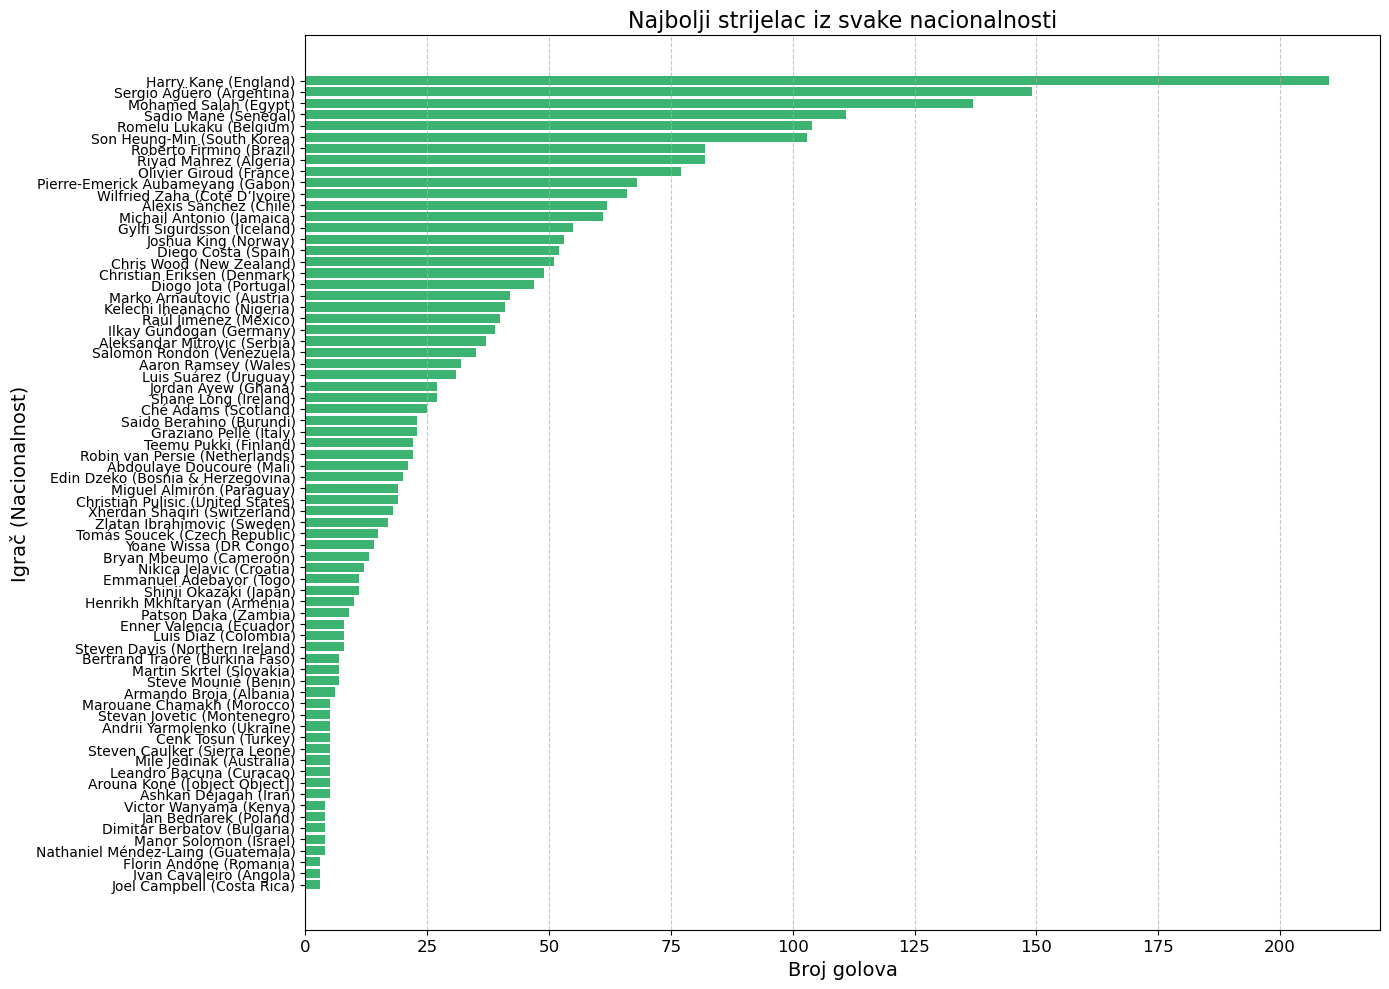

In [86]:



top_scorers_by_nationality = df.groupby(['Nationality', 'Player'])['Stat'].sum().reset_index()

best_player_by_nationality = top_scorers_by_nationality.sort_values(['Nationality', 'Stat'], ascending=[True, False]).groupby('Nationality').head(1)


best_player_by_nationality = best_player_by_nationality.sort_values(by='Stat', ascending=True)


plt.figure(figsize=(14, 10))
plt.barh(best_player_by_nationality['Player'] + ' (' + best_player_by_nationality['Nationality'] + ')',
         best_player_by_nationality['Stat'], color='mediumseagreen')
plt.title("Najbolji strijelac iz svake nacionalnosti", fontsize=16)
plt.xlabel("Broj golova", fontsize=14)
plt.ylabel("Igrač (Nacionalnost)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()




Ovdje imamo prikaz svih nacionalnosti i igrača koji su najbolji po golovima a predstavljaju tu državu. Među ostalima pronalazi se i naš nekadašnji reprezetativac Nikica jelavić. 

**Korelacija između ukupnih golova tima i golova najboljih strijelaca (2013-2023)**

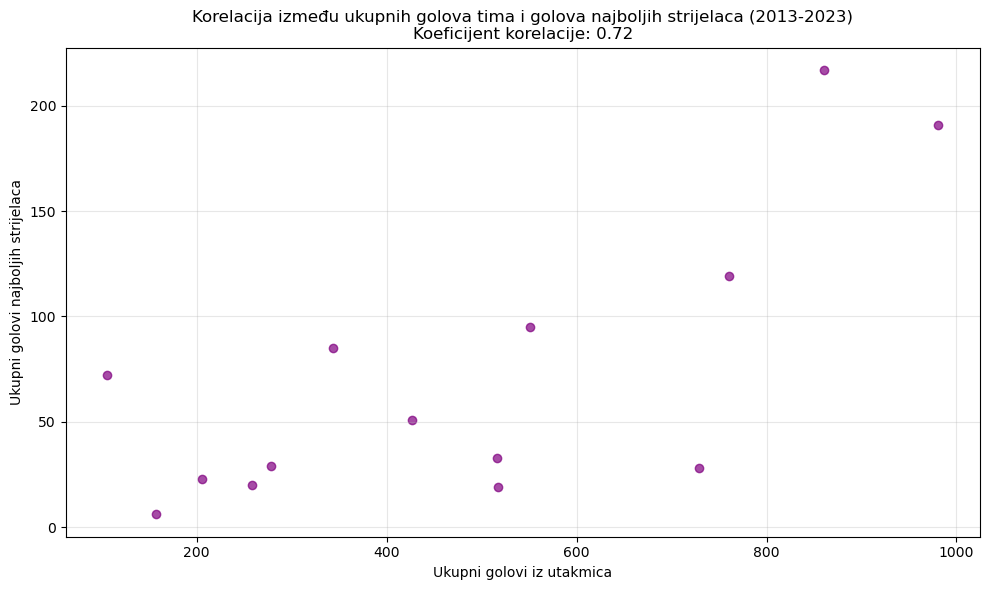

Koeficijent korelacije: 0.72


In [87]:

matches_data = pd.read_csv('premier-league-matches.csv')
goals_data = pd.read_json('Goals.json')


filtered_matches = matches_data[(matches_data['Season_End_Year'] >= 2013) & (matches_data['Season_End_Year'] <= 2023)]


team_goals_from_matches = filtered_matches.groupby('Home')['HomeGoals'].sum() + filtered_matches.groupby('Away')['AwayGoals'].sum()

team_goals_from_top_scorers = goals_data.groupby('Club')['Stat'].sum()


correlation_df = pd.DataFrame({
    'GoalsFromMatches': team_goals_from_matches,
    'GoalsFromTopScorers': team_goals_from_top_scorers
}).dropna()


correlation_coefficient = correlation_df.corr().loc['GoalsFromMatches', 'GoalsFromTopScorers']


plt.figure(figsize=(10, 6))
plt.scatter(correlation_df['GoalsFromMatches'], correlation_df['GoalsFromTopScorers'], color='purple', alpha=0.7)
plt.title(f"Korelacija između ukupnih golova tima i golova najboljih strijelaca (2013-2023)\nKoeficijent korelacije: {correlation_coefficient:.2f}")
plt.xlabel("Ukupni golovi iz utakmica")
plt.ylabel("Ukupni golovi najboljih strijelaca")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Koeficijent korelacije: {correlation_coefficient:.2f}")


Ovaj grafikon prikazuje odnos između ukupnih golova timova u utakmicama i golova njihovih najboljih strijelaca za period 2013–2023. Koeficijent korelacije iznosi 0.72, što ukazuje na snažnu povezanost – timovi s više golova općenito imaju veći doprinos svojih najboljih strijelaca. Ipak, postoje iznimke gdje timovi s manje ukupnih golova ovise više o pojedincima.

**Analiza najmlađih strijelaca po sezoni**

In [106]:



goals_df = goals_data.sort_values(by=['Player', 'Initial Year'])
goals_df['RankChange'] = goals_df.groupby('Player')['Rank'].diff().fillna(0).astype(int)



max_improvement = goals_df.loc[goals_df['RankChange'] == goals_df['RankChange'].max()]
max_drop = goals_df.loc[goals_df['RankChange'] == goals_df['RankChange'].min()]

print("Godine najvećeg poboljšanja za igrače:")
print(max_improvement)

print("\nGodine najvećeg pada za igrače:")
print(max_drop)



Godine najvećeg poboljšanja za igrače:
     Initial Year  Rank        Player Club Nationality  Stat  RankChange
797          2015    96  Nacer Chadli    -     Belgium     3          83
798          2015    96  Papiss Cissé    -     Senegal     3          83

Godine najvećeg pada za igrače:
   Initial Year  Rank               Player Club Nationality  Stat  RankChange
9          2022    10  Aleksandar Mitrovic    -      Serbia    14         -74


<h1> Treći dataset "crveni kartoni"

In [88]:
df = pd.read_json ('RedCards.json')

In [89]:
df.head()

,Initial Year,Rank,Player,Club,Nationality,Stat
0,2022,1,Casemiro,Manchester United,Brazil,2
1,2022,2,Tyler Adams,-,United States,1
2,2022,2,Shandon Baptiste,Brentford,Grenada,1
3,2022,2,Nélson Semedo,Wolverhampton Wanderers,Portugal,1
4,2022,2,João Cancelo,-,Portugal,1


In [90]:
df.columns

Index(['Initial Year', 'Rank', 'Player', 'Club', 'Nationality', 'Stat'], dtype='object')

**utjecaj zabrane igranja na gol statistiku**

C:\Users\Matej\AppData\Local\Temp\ipykernel_2520\1867626302.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_red_cards_by_season = red_cards_df_filtered.groupby('Initial Year').apply(


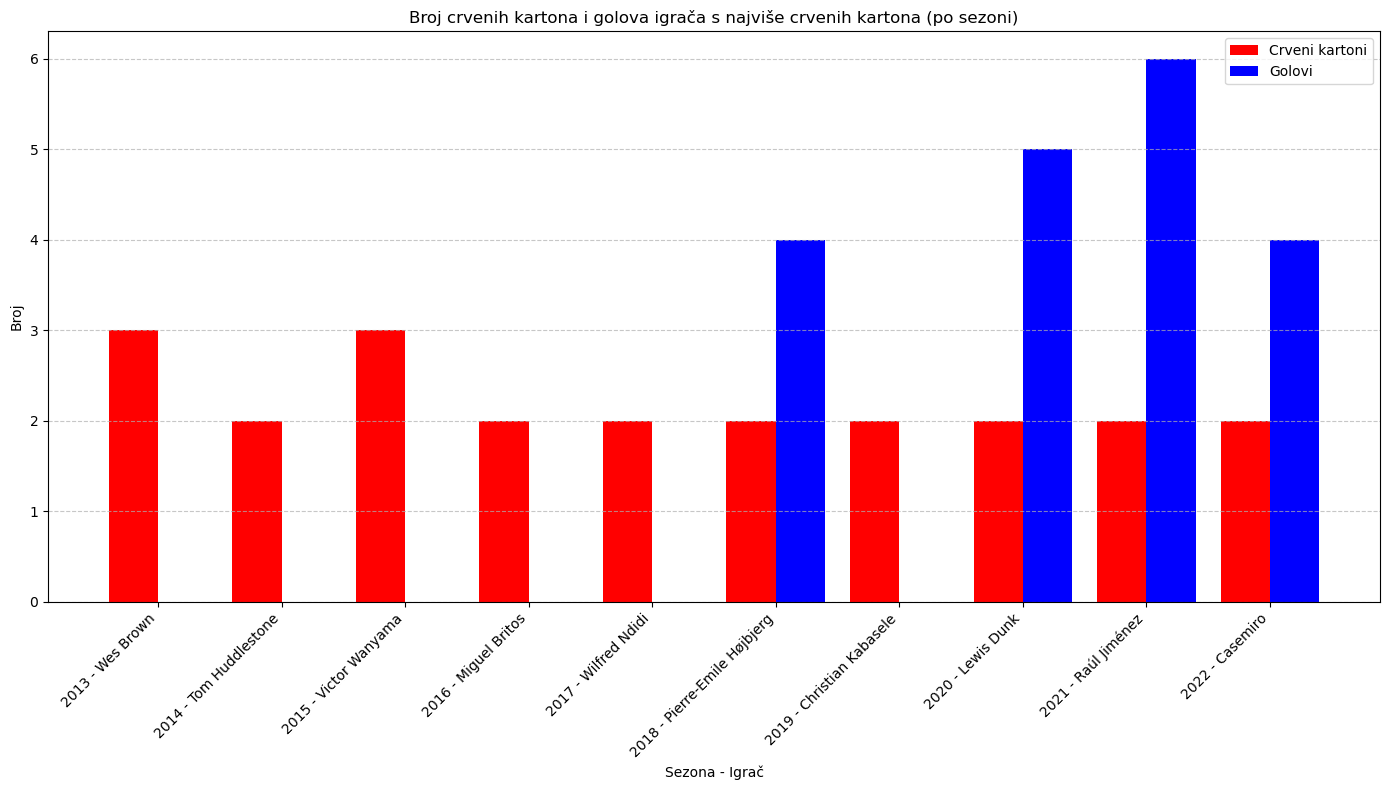

In [91]:

goals_path = 'Goals.json'  
red_cards_path = 'RedCards.json'  
goals_df = pd.read_json(goals_path)
red_cards_df = pd.read_json(red_cards_path)


goals_df_filtered = goals_df[goals_df['Club'].notna()]
red_cards_df_filtered = red_cards_df[red_cards_df['Club'].notna()]

goals_df_filtered.rename(columns={'Stat': 'Goals'}, inplace=True)


top_red_cards_by_season = red_cards_df_filtered.groupby('Initial Year').apply(
    lambda x: x.loc[x['Stat'].idxmax()]
)[['Player', 'Stat', 'Initial Year']]

top_red_cards_by_season.reset_index(drop=True, inplace=True)


seasonal_comparison = pd.merge(
    top_red_cards_by_season,
    goals_df_filtered[['Player', 'Goals', 'Initial Year']],
    on=['Player', 'Initial Year'],
    how='left'
)


seasonal_comparison.rename(columns={'Stat': 'RedCards', 'Goals': 'GoalsScored'}, inplace=True)


seasonal_comparison['GoalsScored'] = seasonal_comparison['GoalsScored'].fillna(0)


plt.figure(figsize=(14, 8))
x = range(len(seasonal_comparison)) 
bar_width = 0.4


plt.bar([i - bar_width / 2 for i in x], seasonal_comparison['RedCards'], width=bar_width, label='Crveni kartoni', color='red')

plt.bar([i + bar_width / 2 for i in x], seasonal_comparison['GoalsScored'], width=bar_width, label='Golovi', color='blue')


plt.xticks(x, [f"{row['Initial Year']} - {row['Player']}" for _, row in seasonal_comparison.iterrows()], rotation=45, ha='right')


plt.title('Broj crvenih kartona i golova igrača s najviše crvenih kartona (po sezoni)')
plt.xlabel('Sezona - Igrač')
plt.ylabel('Broj')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Ovdje imamo prikaz igrača s najviše crvenih kartona i njihov zbroj golova u toj sezoni. Kao što vidimo skup on je razlolik gdje neki igrači uopće nisu zabili niti jedan gol dok neke ranije sezone pokazuju puno bolje rezultate.

**Igrači koji nisu dobili crveni karton po sezoni**

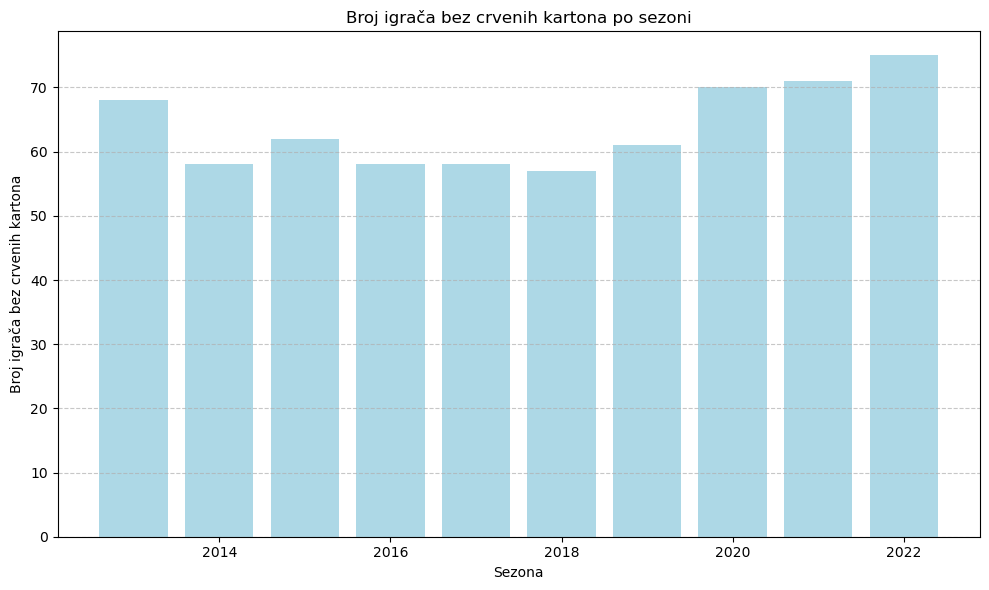

In [ ]:


players_with_no_red_cards = goals_df[~goals_df['Player'].isin(red_cards_df['Player'])]


players_no_red_cards_count = players_with_no_red_cards.groupby('Initial Year')['Player'].count().reset_index()


players_no_red_cards_count.rename(columns={'Initial Year': 'Season', 'Player': 'NumberOfPlayers'}, inplace=True)

plt.figure(figsize=(10, 6))
plt.bar(players_no_red_cards_count['Season'], players_no_red_cards_count['NumberOfPlayers'], color='lightblue')
plt.xlabel('Sezona')
plt.ylabel('Broj igrača bez crvenih kartona')
plt.title('Broj igrača bez crvenih kartona po sezoni')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Ovdje možemo vidjeti podjednak broj igrača koji završe sezonu bez crvenog kartona. zadnje 3 godine se vidi i povećanje takvih igrača što znači da je fair play igre veći.

**Usporedba crvenih kartona u odnosu na broj golova**

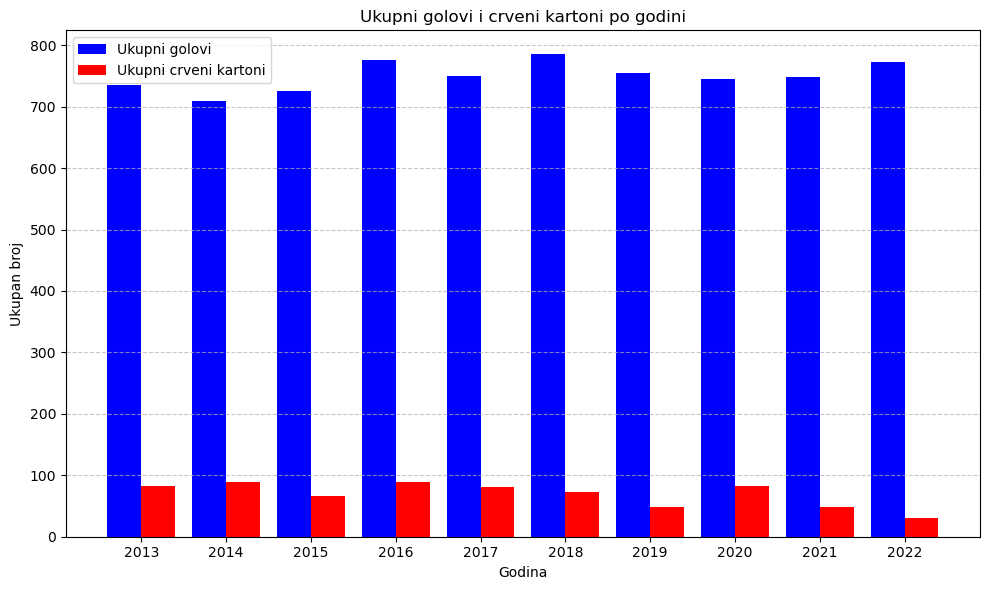

In [93]:



total_goals_per_year = goals_df.groupby('Initial Year')['Stat'].sum().reset_index()
total_red_cards_per_year = red_cards_df.groupby('Initial Year')['Stat'].sum().reset_index()

total_goals_per_year.rename(columns={'Stat': 'TotalGoals', 'Initial Year': 'Year'}, inplace=True)
total_red_cards_per_year.rename(columns={'Stat': 'TotalRedCards', 'Initial Year': 'Year'}, inplace=True)


combined_totals = pd.merge(total_goals_per_year, total_red_cards_per_year, on='Year', how='outer').fillna(0)


plt.figure(figsize=(10, 6))
plt.bar(combined_totals['Year'] - 0.2, combined_totals['TotalGoals'], width=0.4, label='Ukupni golovi', color='blue')
plt.bar(combined_totals['Year'] + 0.2, combined_totals['TotalRedCards'], width=0.4, label='Ukupni crveni kartoni', color='red')
plt.xlabel('Godina')
plt.ylabel('Ukupan broj')
plt.title('Ukupni golovi i crveni kartoni po godini')
plt.xticks(combined_totals['Year'])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Ovdje smo zapravo htjeli vidjeti je li sezona sa više crvenih kartona završila sa više akrtona s obzirom da protivnička ekipa nakon kartona ima više igrača. Rezultati pokazuju da kartoni i nemaju takav utjecaj odnosno da je se puno povećala razlika na odnosu sezone sa manje kartona.

**Korelacija između golova i crvenih kartona:**

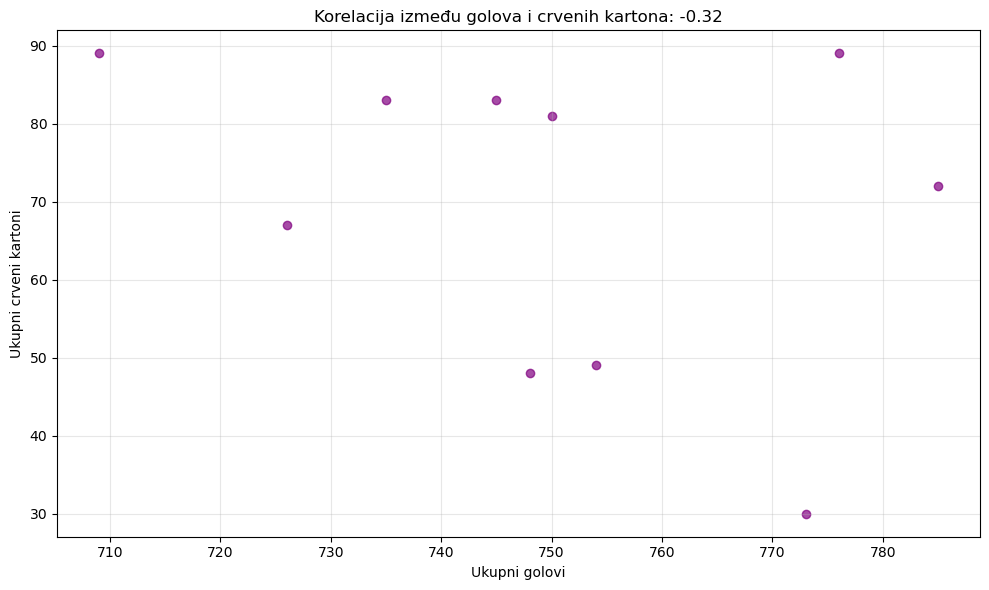

Koeficijent korelacije: -0.32


In [95]:



total_goals_per_year = goals_df.groupby('Initial Year')['Stat'].sum().reset_index()
total_red_cards_per_year = red_cards_df.groupby('Initial Year')['Stat'].sum().reset_index()


total_goals_per_year.rename(columns={'Stat': 'TotalGoals', 'Initial Year': 'Year'}, inplace=True)
total_red_cards_per_year.rename(columns={'Stat': 'TotalRedCards', 'Initial Year': 'Year'}, inplace=True)


combined_totals = pd.merge(total_goals_per_year, total_red_cards_per_year, on='Year', how='outer').fillna(0)

correlation = combined_totals[['TotalGoals', 'TotalRedCards']].corr().loc['TotalGoals', 'TotalRedCards']

plt.figure(figsize=(10, 6))
plt.scatter(combined_totals['TotalGoals'], combined_totals['TotalRedCards'], color='purple', alpha=0.7)
plt.title(f'Korelacija između golova i crvenih kartona: {correlation:.2f}')
plt.xlabel('Ukupni golovi')
plt.ylabel('Ukupni crveni kartoni')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


print(f'Koeficijent korelacije: {correlation:.2f}')


s obzirom da se radi o negativnoj korelaciji, ovo znači da broj ukupnih golova slabo utječe zbog crvenog kartona.

**Timovi sa najviše crvenih kartona**

In [98]:



team_red_card_totals =red_cards_df_filtered.groupby('Club')['Stat'].sum().reset_index()


team_red_card_totals = team_red_card_totals.sort_values(by='Stat', ascending=False)


print(team_red_card_totals)


                       Club  Stat
0                         -   591
2               Aston Villa    17
11          Manchester City    14
18          West Ham United    11
15              Southampton     8
4    Brighton & Hove Albion     6
12        Manchester United     6
13         Newcastle United     5
17        Tottenham Hotspur     4
8                   Everton     4
1                   Arsenal     4
10                Liverpool     3
7            Crystal Palace     3
6                   Chelsea     3
3                 Brentford     3
19  Wolverhampton Wanderers     3
9                    Fulham     2
14         Sheffield United     2
16             Swansea City     1
5                   Burnley     1


**UVOZ U BAZU PODATAKA**

In [107]:
import sqlite3



goals_file_path = 'Goals.json'  
red_cards_file_path = 'RedCards.json'  
matches_file_path = 'premier-league-matches.csv'  

goals_data = pd.read_json(goals_file_path)
red_cards_data = pd.read_json(red_cards_file_path)
matches_data = pd.read_csv(matches_file_path)


conn = sqlite3.connect('football_data.db')

goals_data.to_sql('Goals', conn, if_exists='replace', index=False)
red_cards_data.to_sql('RedCards', conn, if_exists='replace', index=False)
matches_data.to_sql('PremierLeagueMatches', conn, if_exists='replace', index=False)


conn.commit()
conn.close()

print("Podaci iz Goals, RedCards i Premier League Matches uspješno su dodani u SQLite bazu!")


Podaci iz Goals, RedCards i Premier League Matches uspješno su dodani u SQLite bazu!


**Postavljanje REST API-ja na Flask**

In [108]:
pip install flask

In [ ]:
from flask import Flask, jsonify
import sqlite3

app = Flask(__name__)


def connect_db():
    conn = sqlite3.connect('football_data.db')  
    conn.row_factory = sqlite3.Row  
    return conn


@app.route('/redcards', methods=['GET'])
def get_red_cards():
    try:
        conn = connect_db()
        cursor = conn.cursor()
        
        
        cursor.execute("SELECT * FROM RedCards")
        rows = cursor.fetchall()
        
        
        red_cards = [dict(row) for row in rows]
        
        return jsonify(red_cards), 200
    except Exception as e:
        return jsonify({"error": str(e)}), 500  
    finally:
        conn.close()
        
@app.route('/goals', methods=['GET'])
def get_goals():
    try:
        conn = connect_db()
        cursor = conn.cursor()
        
       
        cursor.execute("SELECT * FROM Goals")
        rows = cursor.fetchall()
        
        
        goals = [dict(row) for row in rows]
        
        return jsonify(goals), 200  
    except Exception as e:
        return jsonify({"error": str(e)}), 500  
    finally:
        conn.close()
if __name__ == '__main__':
    app.run(debug=True, port=5001, use_reloader=False)  


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5001
Press CTRL+C to quit
127.0.0.1 - - [24/Jan/2025 00:53:52] "GET /goals HTTP/1.1" 200 -


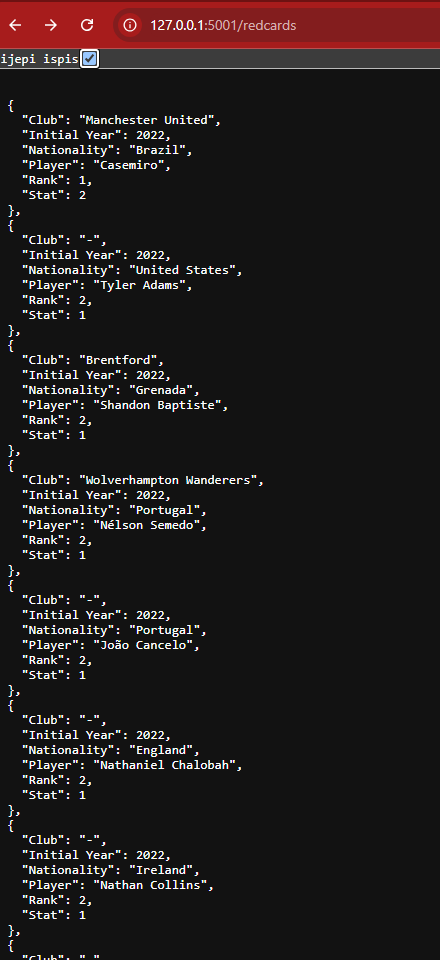

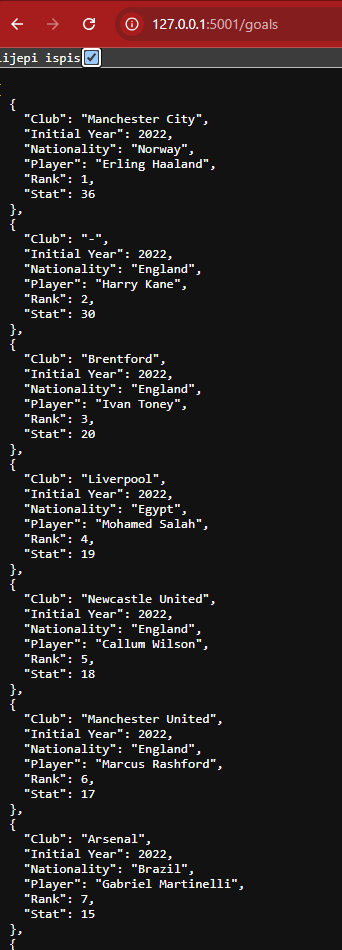

**KRITIČKI OSVRT**

U ovom radu sam analizirao podatke rezultata utakmica kao i invidualne kvalitete igrača i njihov utjecaj na utakmicu. projekt nam daje uvide o podacima koji utjču na sam rezultat. Glavni nedostatak ovog dataseta je taj što neki igrači koji nisu više u engleskoj ligi ne piše klub za koji je prije igrao. Raspon od 10 godina sam koristio jer nema smisla više analizirati igrača zbog kratkog vijeka igranja nogometa posebice an najjelitnijoj ligi.

**ZAKLJUČAK**

Analizom smo pregledali korelacije između skupova kao i pojedinačne analize. Detaljnijom analizom može se sigurno doći do još zanimljivijih infomarcija koje čak nogometni klubovi koriste u praksi. Rad sa podacima i na kraju rad sa bazom bio je zanimljiv za učiti i istražiti sami rad okoline. 

**LITERATURA**

[1] Think Stats 3e - https://greenteapress.com/wp/think-stats-3e/

[2] Python Data science - https://jakevdp.github.io/PythonDataScienceHandbook/